In [3]:
project_name = "analysis-on-videogames-sales-data"

In [15]:
!pip install jovian --upgrade -q
!pip install plotly

In [4]:
import jovian
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np
from plotly.offline import init_notebook_mode,iplot
import pandas as pd
%matplotlib inline

In [5]:
data = 'C:/Users/balaj/Documents/VideoGameSales.csv' #locate the CSV dataset in variable data 

videogame_df = pd.read_csv(data) #read the data using pandas and store it in videogame_df variable
videogame_df #display the data (completely )

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/balaj/Documents/VideoGameSales.csv'

In [5]:
videogame_df.describe()

Rank         Year    NA_Sales   EUR_Sales   JAP_Sales  \
count  500.000000   496.000000  500.000000  500.000000  500.000000   
mean   250.500000  2005.092742    3.014580    1.916060    0.820980   
std    144.481833     7.260761    3.415832    2.061512    1.321768   
min      1.000000  1980.000000    0.000000    0.000000    0.000000   
25%    125.750000  2001.000000    1.540000    0.990000    0.040000   
50%    250.500000  2007.000000    2.160000    1.405000    0.160000   
75%    375.250000  2010.000000    3.242500    2.175000    1.035000   
max    500.000000  2016.000000   41.490000   29.020000   10.220000   

        IND_Sales  Global_Sales  
count  500.000000    500.000000  
mean     0.600800      6.352300  
std      0.841739      6.146037  
min      0.000000      2.890000  
25%      0.220000      3.500000  
50%      0.410000      4.390000  
75%      0.702500      6.590000  
max     10.570000     82.740000

In [6]:
videogame_df.shape 
#To display the shape of the data (rows, columns)

(500, 11)

In [7]:
videogame_df.sort_values(by = ['Name']).head(30) 
#Display top 30 rows and Sort by 'Name' column

Rank                                  Name Platform    Year       Genre  \
420   421              007: Tomorrow Never Dies       PS  1999.0     Shooter   
433   434        Ace Combat 04: Shattered Skies      PS2  2001.0  Simulation   
435   436                       Animal Crossing       GC  2001.0  Simulation   
226   227            Animal Crossing: City Folk      Wii  2008.0  Simulation   
476   477  Animal Crossing: Happy Home Designer      3DS  2015.0  Simulation   
73     74             Animal Crossing: New Leaf      3DS  2012.0  Simulation   
41     42           Animal Crossing: Wild World       DS  2005.0  Simulation   
218   219                      Assassin's Creed      PS3  2007.0   Adventure   
158   159                      Assassin's Creed     X360  2007.0   Adventure   
176   177                   Assassin's Creed II     X360  2009.0      Action   
156   157                   Assassin's Creed II      PS3  2009.0      Action   
172   173                  Assassin's Creed III     X360  2012.0      Action   
128   129                  Assassin's Creed III      PS3  2012.0      Action   
307   308       Assassin's Creed IV: Black Flag      PS3  2013.0      Action   
401   402       Assassin's Creed IV: Black Flag     X360  2013.0      Action   
409   410            Assassin's Creed Syndicate      PS4  2015.0      Action   
373   374         Assassin's Creed: Brotherhood     X360  2010.0      Action   
273   274         Assassin's Creed: Revelations     X360  2011.0      Action   
263   264         Assassin's Creed: Revelations      PS3  2011.0      Action   
304   305               Assassin's Creed: Unity      PS4  2014.0      Action   
381   382               Assassin's Creed: Unity     XOne  2014.0      Action   
258   259                             Asteroids     2600  1980.0     Shooter   
341   342                         Banjo-Kazooie      N64  1998.0    Platform   
421   422                              Baseball      NES  1983.0      Sports   
262   263                 Batman: Arkham Asylum      PS3  2009.0      Action   
375   376                 Batman: Arkham Asylum     X360  2009.0      Action   
222   223                   Batman: Arkham City     X360  2011.0      Action   
159   160                   Batman: Arkham City      PS3  2011.0      Action   
322   323                 Batman: Arkham Knight      PS4  2015.0      Action   
99    100                         Battlefield 3     X360  2011.0     Shooter   

                                  Publisher  NA_Sales  EUR_Sales  JAP_Sales  \
420                         Electronic Arts      1.72       1.33       0.00   
433      Sony Computer Entertainment Europe      2.06       0.56       0.38   
435                                Nintendo      1.92       0.16       0.99   
226                                Nintendo      1.87       1.12       1.32   
476                                Nintendo      0.47       1.00       1.39   
73                                 Nintendo      2.01       2.32       4.36   
41                                 Nintendo      2.55       3.52       5.33   
218                                 Ubisoft      1.91       2.00       0.09   
158                                 Ubisoft      3.28       1.65       0.07   
176                                 Ubisoft      3.10       1.56       0.08   
156                                 Ubisoft      2.54       1.95       0.21   
172                                 Ubisoft      3.13       1.71       0.03   
128                                 Ubisoft      2.64       2.56       0.16   
307                                 Ubisoft      1.33       1.71       0.13   
401                                 Ubisoft      1.90       1.14       0.01   
409                                 Ubisoft      0.80       1.92       0.06   
373                                 Ubisoft      2.84       0.39       0.03   
273                                 Ubisoft      2.25       1.47       0.04   
263                    

In [8]:
videogame_df.head(10)
#displays top 10 rows of the dataset

Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EUR_Sales  JAP_Sales  IND_Sales  Global_Sales  
0     41.49      29.02       3.77       8.46         82.74  
1     29.08       3.58       6.81       0.77         40.24  
2     15.85      12.88       3.79       3.31         35.82  
3     15.75      11.01       3.28       2.96         33.00  
4     11.27       8.89      10.22       1.00         31.37  
5     23.20       2.26       4.22       0.58         30.26  
6     11.38       9.23       6.50       2.90         30.01  
7     14.03       9.20       2.93       2.85         29.02  
8     14.59       7.06       4.70       2.26         28.62  
9     26.93       0.63       0.28       0.47         28.31

In [9]:
videogame_df.tail(10)
#displays 10 rows from bottom of dataframe

Rank                                         Name Platform    Year  \
490   491                      WarioWare: Smooth Moves      Wii  2006.0   
491   492                       Cooking Mama: Cook Off      Wii  2007.0   
492   493          Super Mario World 2: Yoshi's Island      GBA  2002.0   
493   494                                      FIFA 14      PS4  2013.0   
494   495                                    Titanfall     XOne  2014.0   
495   496                   Sonic Mega Collection Plus      PS2  2004.0   
496   497                       Sega Superstars Tennis     X360  2008.0   
497   498  World Soccer Winning Eleven 7 International      PS2  2003.0   
498   499                  Need for Speed: Most Wanted      PS3  2012.0   
499   500                             Hot Shots Golf 3      PS2  2001.0   

          Genre                     Publisher  NA_Sales  EUR_Sales  JAP_Sales  \
490      Puzzle                      Nintendo      0.87       1.06       0.73   
491  Simulation                     505 Games      1.43       1.13       0.05   
492    Platform                      Nintendo      1.75       0.45       0.62   
493      Sports               Electronic Arts      0.61       1.85       0.11   
494     Shooter               Electronic Arts      1.84       0.80       0.04   
495        Misc                          Sega      1.54       1.14       0.00   
496      Sports                          Sega      1.75       0.86       0.00   
497      Sports  Konami Digital Entertainment      0.08       1.24       1.13   
498      Racing               Electronic Arts      0.71       1.51       0.06   
499      Sports   Sony Computer Entertainment      0.99       0.32       1.38   

     IND_Sales  Global_Sales  
490       0.26          2.92  
491       0.30          2.91  
492       0.09          2.91  
493       0.33          2.90  
494       0.22          2.90  
495       0.22          2.90  
496       0.28          2.90  
497       0.45          2.90  
498       0.61          2.89  
499       0.20          2.89

In [10]:
videogame_df[50:70]
#displays rows in given range

Rank                                Name Platform    Year         Genre  \
50    51  Super Mario Land 2: 6 Golden Coins       GB  1992.0     Adventure   
51    52                 Grand Theft Auto IV     X360  2008.0        Action   
52    53                        Gran Turismo       PS  1997.0        Racing   
53    54                 Super Mario 3D Land      3DS  2011.0      Platform   
54    55                      Gran Turismo 5      PS3  2010.0        Racing   
55    56      Call of Duty: Modern Warfare 2      PS3  2009.0       Shooter   
56    57                 Grand Theft Auto IV      PS3  2008.0        Action   
57    58               Super Mario All-Stars     SNES  1993.0      Platform   
58    59   Pokemon FireRed/Pokemon LeafGreen      GBA  2004.0  Role-Playing   
59    60                      Super Mario 64       DS  2004.0      Platform   
60    61                        Just Dance 3      Wii  2011.0          Misc   
61    62                Call of Duty: Ghosts     X360  2013.0       Shooter   
62    63                         Halo: Reach     X360  2010.0       Shooter   
63    64                       Mario Kart 64      N64  1996.0        Racing   
64    65             New Super Mario Bros. 2      3DS  2012.0      Platform   
65    66                              Halo 4     X360  2012.0       Shooter   
66    67                   Final Fantasy VII       PS  1997.0  Role-Playing   
67    68                Call of Duty: Ghosts      PS3  2013.0       Shooter   
68    69                        Just Dance 2      Wii  2010.0          Misc   
69    70                      Gran Turismo 2       PS  1999.0        Racing   

                      Publisher  NA_Sales  EUR_Sales  JAP_Sales  IND_Sales  \
50                     Nintendo      6.16       2.04       2.69       0.29   
51         Take-Two Interactive      6.76       3.10       0.14       1.03   
52  Sony Computer Entertainment      4.02       3.87       2.54       0.52   
53                     Nintendo      4.89       2.99       2.13       0.78   
54  Sony Computer Entertainment      2.96       4.88       0.81       2.12   
55                   Activision      4.99       3.69       0.38       1.63   
56         Take-Two Interactive      4.76       3.76       0.44       1.62   
57                     Nintendo      5.99       2.15       2.12       0.29   
58                     Nintendo      4.34       2.65       3.15       0.35   
59                     Nintendo      5.08       3.11       1.25       0.98   
60                      Ubisoft      6.05       3.15       0.00       1.07   
61                   Activision      6.72       2.63       0.04       0.82   
62       Microsoft Game Studios      7.03       1.98       0.08       0.78   
63                     Nintendo      5.55       1.94       2.23       0.15   
64                     Nintendo      3.66       3.07       2.47       0.63   
65       Microsoft Game Studios      6.63       2.36       0.04       0.73   
66  Sony Computer Entertainment      3.01       2.47       3.28       0.96   
67                   Activision      4.09       3.73       0.38       1.38   
68                      Ubisoft      5.84       2.89       0.01       0.78   
69  Sony Computer Entertainment      3.88       3.42       1.69       0.50   

    Global_Sales  
50         11.18  
51         11.02  
52         10.95  
53         10.79  
54         10.77  
55         10.69  
56         10.57  
57         10.55  
58         10.49  
59         10.42  
60         10.26  
61         10.21  
62          9.88  
63          9.87  
64          9.82  
65          9.76  
66          9.72  
67          9.59  
68          9.52  
69          9.49

In [11]:
#method 1 to print all column names
for col in videogame_df.columns:
    print(col)

Rank
Name
Platform
Year
Genre
Publisher
NA_Sales
EUR_Sales
JAP_Sales
IND_Sales
Global_Sales


In [12]:
#method 2 to print all column names
list(videogame_df.columns)

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EUR_Sales',
 'JAP_Sales',
 'IND_Sales',
 'Global_Sales']

In [13]:
a=videogame_df["Name"].unique()
b=videogame_df["Genre"].unique()
c=videogame_df["Publisher"].unique()
#finding all unique names only using numpy.ndarray

In [14]:
print('Total Games by `Name` count(unique) :',len(a))
print('Total Games by `Genre` count(unique) :',len(b))
print('Total Games by `Publisher` count(unique) :',len(c))

Total Games by `Name` count(unique) : 431
Total Games by `Genre` count(unique) : 12
Total Games by `Publisher` count(unique) : 34


In [15]:
vg_plot=videogame_df[0:25]
vg_plot

Rank                                          Name Platform    Year  \
0      1                                    Wii Sports      Wii  2006.0   
1      2                             Super Mario Bros.      NES  1985.0   
2      3                                Mario Kart Wii      Wii  2008.0   
3      4                             Wii Sports Resort      Wii  2009.0   
4      5                      Pokemon Red/Pokemon Blue       GB  1996.0   
5      6                                        Tetris       GB  1989.0   
6      7                         New Super Mario Bros.       DS  2006.0   
7      8                                      Wii Play      Wii  2006.0   
8      9                     New Super Mario Bros. Wii      Wii  2009.0   
9     10                                     Duck Hunt      NES  1984.0   
10    11                                    Nintendogs       DS  2005.0   
11    12                                 Mario Kart DS       DS  2005.0   
12    13                   Pokemon Gold/Pokemon Silver       GB  1999.0   
13    14                                       Wii Fit      Wii  2007.0   
14    15                                  Wii Fit Plus      Wii  2009.0   
15    16                            Kinect Adventures!     X360  2010.0   
16    17                            Grand Theft Auto V      PS3  2013.0   
17    18                 Grand Theft Auto: San Andreas      PS2  2004.0   
18    19                             Super Mario World     SNES  1990.0   
19    20  Brain Age: Train Your Brain in Minutes a Day       DS  2005.0   
20    21                 Pokemon Diamond/Pokemon Pearl       DS  2006.0   
21    22                              Super Mario Land       GB  1989.0   
22    23                           Super Mario Bros. 3      NES  1988.0   
23    24                            Grand Theft Auto V     X360  2013.0   
24    25                   Grand Theft Auto: Vice City      PS2  2002.0   

           Genre               Publisher  NA_Sales  EUR_Sales  JAP_Sales  \
0         Sports                Nintendo     41.49      29.02       3.77   
1       Platform                Nintendo     29.08       3.58       6.81   
2         Racing                Nintendo     15.85      12.88       3.79   
3         Sports                Nintendo     15.75      11.01       3.28   
4   Role-Playing                Nintendo     11.27       8.89      10.22   
5         Puzzle                Nintendo     23.20       2.26       4.22   
6       Platform                Nintendo     11.38       9.23       6.50   
7           Misc                Nintendo     14.03       9.20       2.93   
8       Platform                Nintendo     14.59       7.06       4.70   
9        Shooter                Nintendo     26.93       0.63       0.28   
10    Simulation                Nintendo      9.07      11.00       1.93   
11        Racing                Nintendo      9.81       7.57       4.13   
12  Role-Playing                Nintendo      9.00       6.18       7.20   
13        Sports                Nintendo      8.94       8.03       3.60   
14        Sports                Nintendo      9.09       8.59       2.53   
15          Misc  Microsoft Game Studios     14.97       4.94       0.24   
16        Action    Take-Two Interactive      7.01       9.27       0.97   
17        Action    Take-Two Interactive      9.43       0.40       0.41   
18      Platform                Nintendo     12.78       3.75       3.54   
19          Misc                Nintendo      4.75       9.26       4.16   
20  Role-Playing                Nintendo      6.42       4.52       6.04   
21      Platform                Nintendo     10.83       2.71       4.18   
22      Platform                Nintendo      9.54       3.44       3.84   
23        Action    Take-Two Interactive      9.63       5.31       0.06   
24        Action    Take-Two Interactive      8.41       5.49       0.47   

    IND_Sales  Global_Sales  
0        8.46         82.74  
1        0.77   

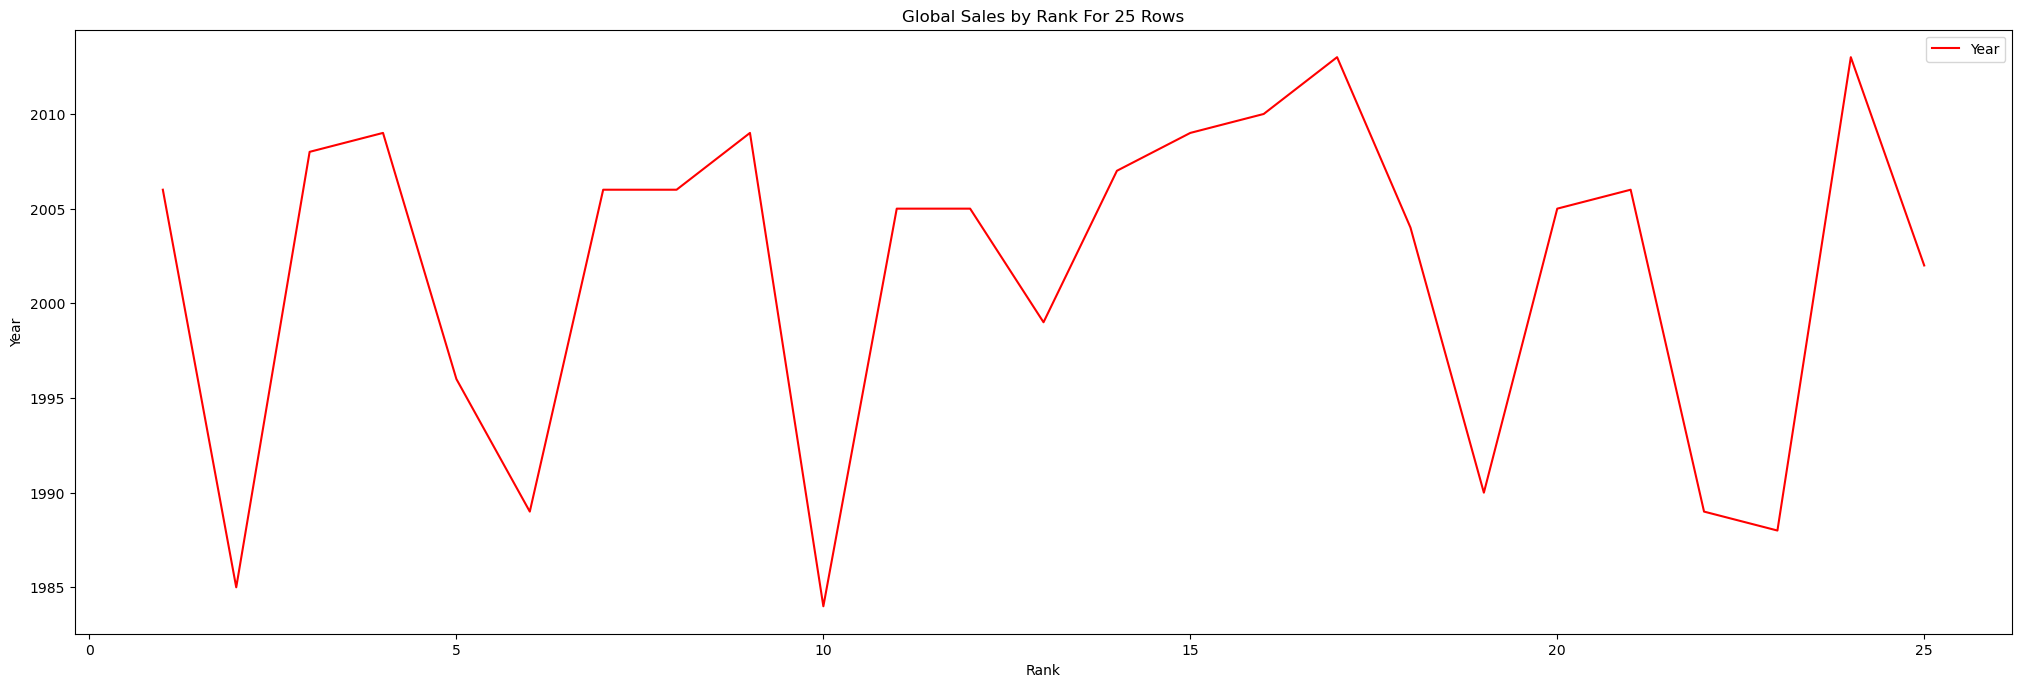

In [16]:
x = vg_plot['Rank']
y = vg_plot['Year']
plt.figure(figsize=(25,8), dpi= 100)
plt.plot(x,y, label = 'Year', color = 'red')
plt.xlabel('Rank')
plt.ylabel('Year')
plt.title('Global Sales by Rank For 25 Rows')
plt.legend()
plt.show()

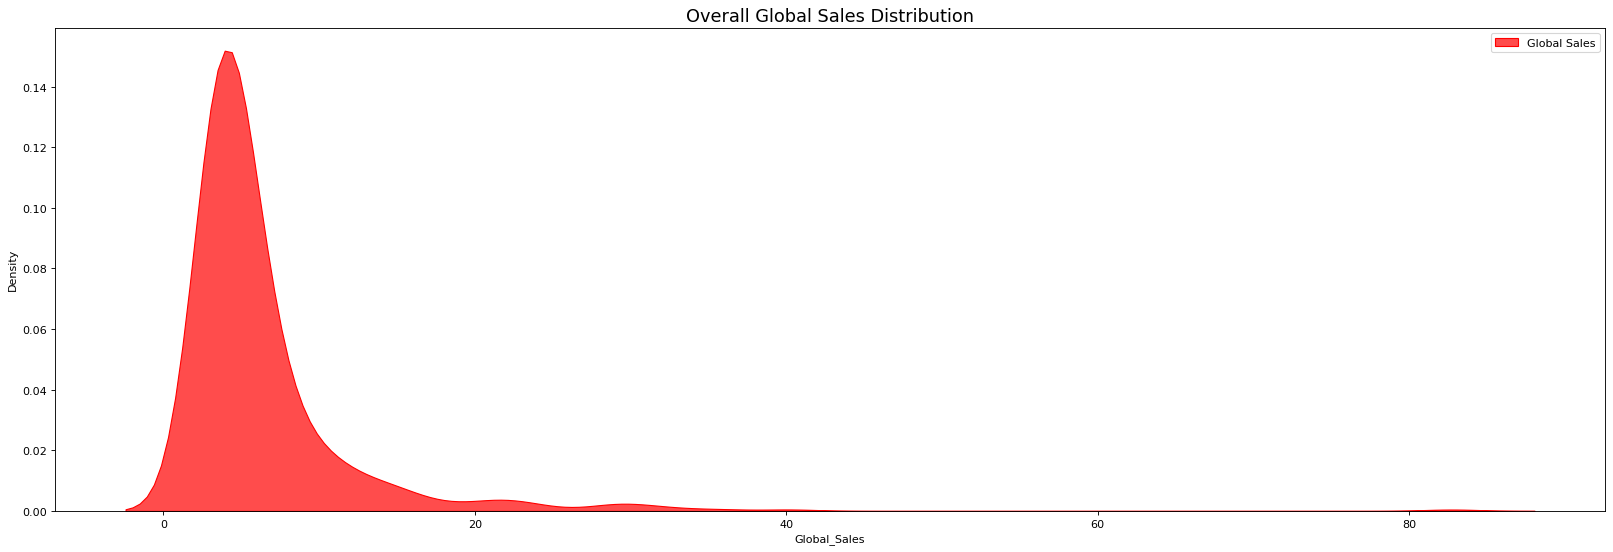

In [17]:
# Draw Plot
plt.figure(figsize=(25,8), dpi= 80)
sns.kdeplot(videogame_df.Global_Sales, shade=True, label = 'Global Sales', color="r", alpha=.7)

# Decoration
plt.title('Overall Global Sales Distribution', fontsize=16)
plt.legend()
plt.show()

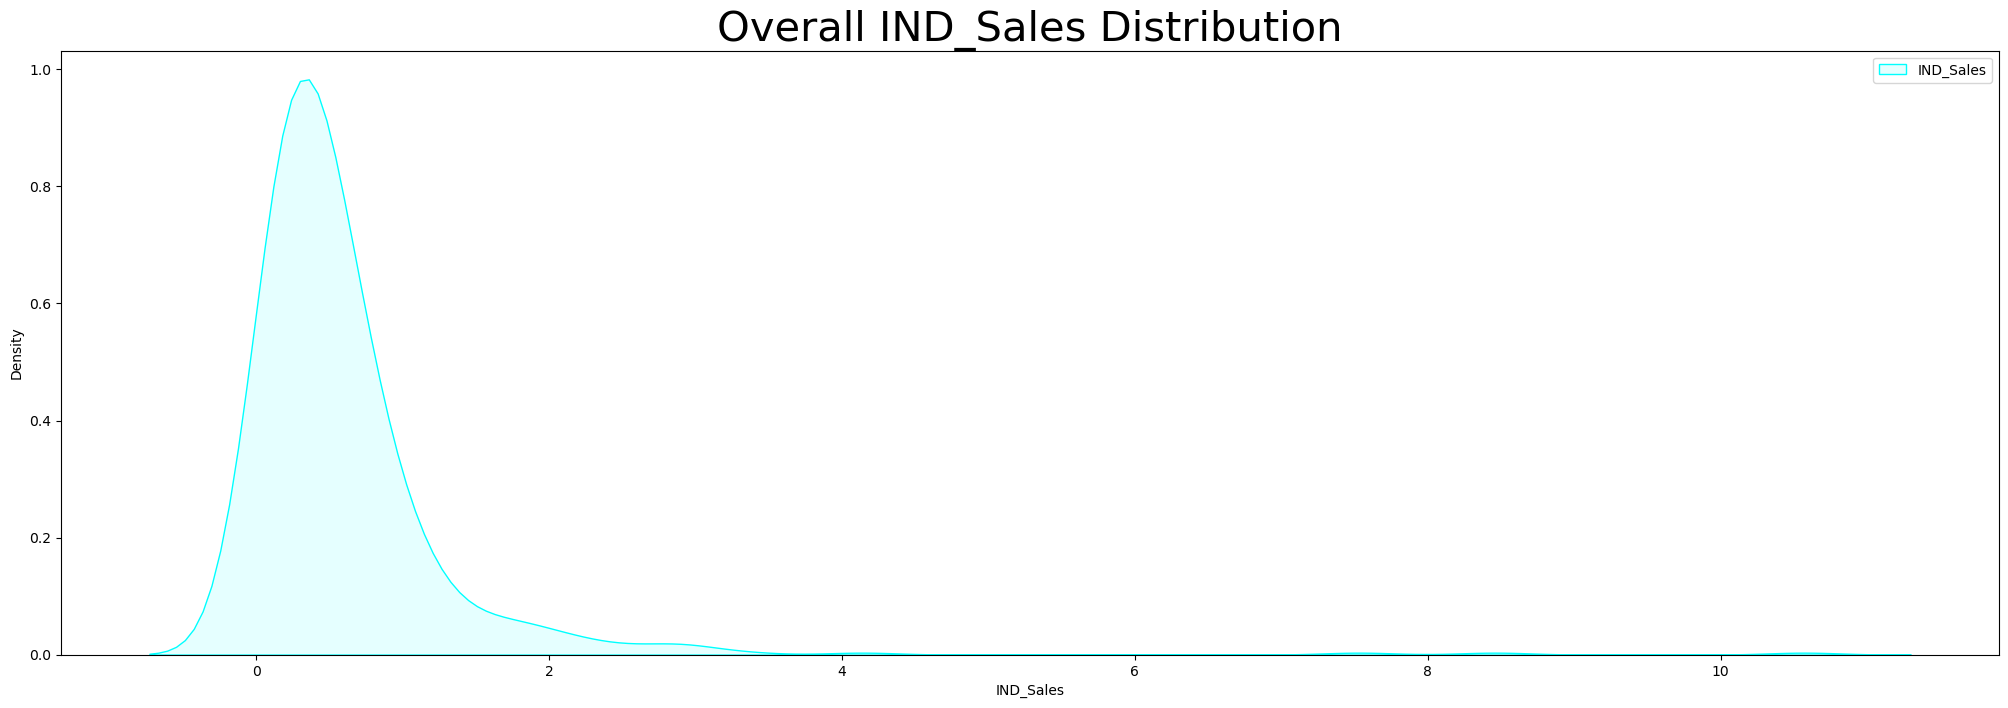

In [18]:
plt.figure(figsize=(25,8), dpi= 100)
sns.kdeplot(videogame_df.IND_Sales, shade=True, label = 'IND_Sales', color="cyan", alpha=.10)
plt.title('Overall IND_Sales Distribution', fontsize=30)
plt.legend()
plt.show()

In [19]:
total = vg_plot['Global_Sales']
NA = vg_plot['NA_Sales']
EUR = vg_plot['EUR_Sales']
JAP = vg_plot['JAP_Sales']
IND = vg_plot['IND_Sales']

In [20]:
IND

0      8.46
1      0.77
2      3.31
3      2.96
4      1.00
5      0.58
6      2.90
7      2.85
8      2.26
9      0.47
10     2.75
11     1.92
12     0.71
13     2.15
14     1.79
15     1.67
16     4.14
17    10.57
18     0.55
19     2.05
20     1.37
21     0.42
22     0.46
23     1.38
24     1.78
Name: IND_Sales, dtype: float64

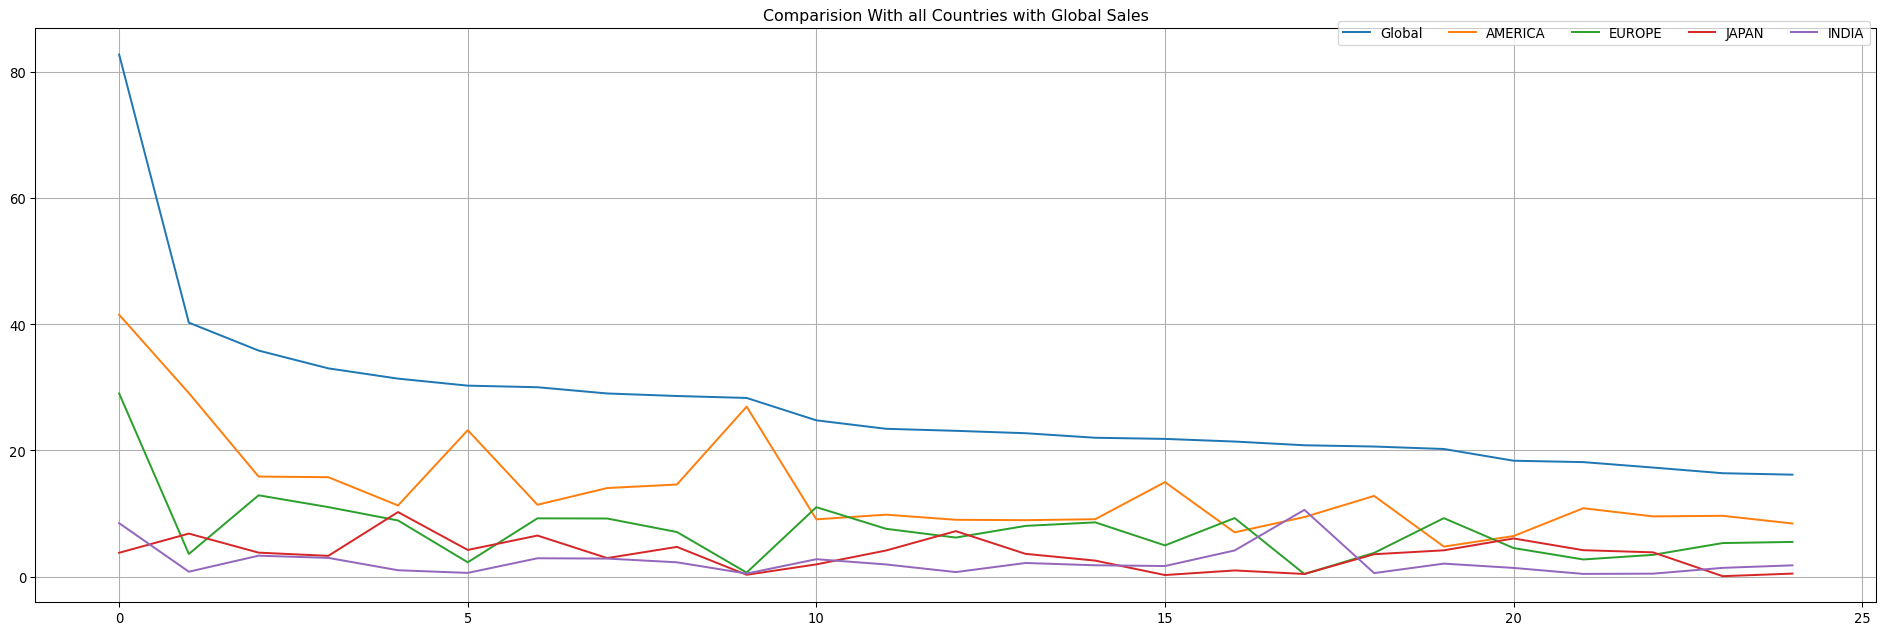

In [21]:
plt.figure(figsize=(25,8), dpi=95)
plt.grid(True)
plt.title('Comparision With all Countries with Global Sales')
plt.plot(total, label = 'Global')
plt.plot(NA, label = 'AMERICA')
plt.plot(EUR, label = 'EUROPE')
plt.plot(JAP, label = 'JAPAN')
plt.plot(IND, label = 'INDIA')
plt.legend(bbox_to_anchor =(1.0, 1.025), ncol = 5)

Text(0.5, 1.0, 'Stepfield type of Comparision of Global with all Countries')

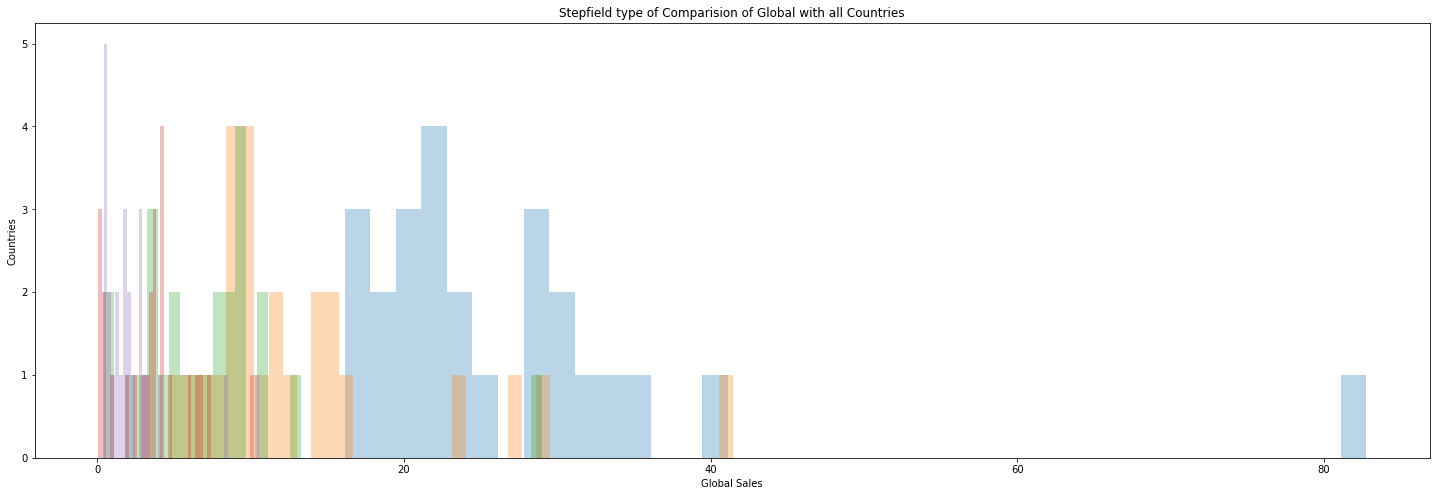

In [22]:
plt.figure(figsize=(25,8))
kwargs = dict(histtype='barstacked', alpha=0.3, bins=40)
plt.hist(total, **kwargs)
plt.hist(NA, **kwargs)
plt.hist(EUR, **kwargs)
plt.hist(JAP, **kwargs)
plt.hist(IND, **kwargs)
plt.xlabel('Global Sales')
plt.ylabel('Countries')
plt.title('Stepfield type of Comparision of Global with all Countries')

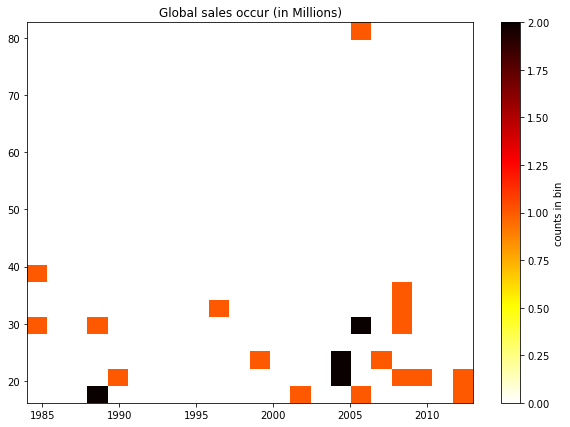

In [23]:
plt.figure(figsize=(10,7))
x = vg_plot['Year']
y = vg_plot['Global_Sales']
plt.title('Global sales occur (in Millions)')
plt.hist2d(x, y, bins=22, cmap='hot_r')
cb = plt.colorbar()
cb.set_label('counts in bin')

C:\Users\balaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



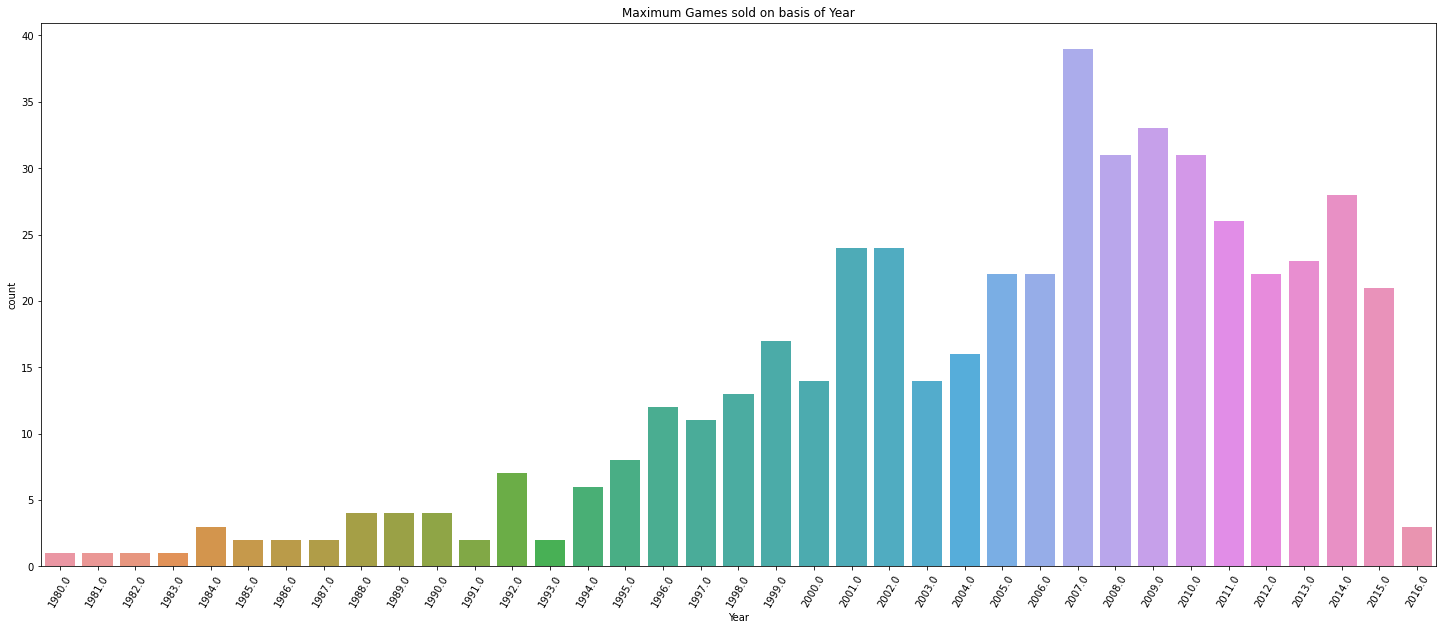

In [51]:
plt.figure(figsize=(25,10))
sns.countplot('Year',data=videogame_df)
plt.title('Maximum Games sold on basis of Year')
plt.xticks(rotation=60)
plt.show()

In [25]:
#top platforms (name of the platform,total number of games developed for that platform)
topPlatforms_index = videogame_df.Platform.value_counts().head(10).index
topPlatforms_values = videogame_df.Platform.value_counts().head(10).values

In [26]:
#top genres (name of the genre,total number of games developed in that genre)
topGenres_index = videogame_df.Genre.value_counts().head(10).index
topGenres_values = videogame_df.Genre.value_counts().head(10).values

In [27]:
#top game developers/publishers (name of the publisher,total number of games published by that publisher)
topPublisher_index = videogame_df.Publisher.value_counts().head(10).index
topPublisher_values = videogame_df.Publisher.value_counts().head(10).values

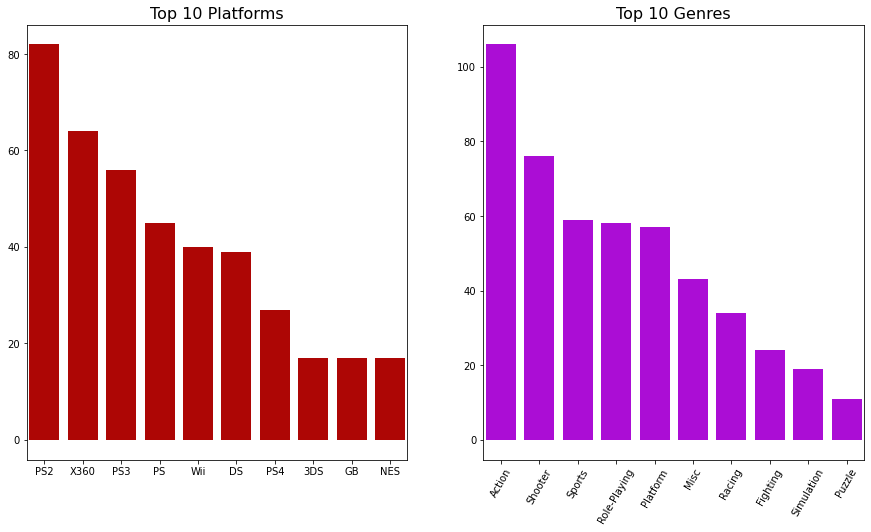

In [50]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8), facecolor='white')
plt.xticks(rotation=60)
##top platforms used for games
ax1.vlines(x=topPlatforms_index, ymin=0, ymax=topPlatforms_values, color='#AD0605', linewidth=30)
ax1.set_title('Top 10 Platforms',fontsize=16)
#top genres of Games accordingly
ax2.vlines(x=topGenres_index, ymin=0, ymax=topGenres_values, color='#AB0DD5', linewidth=30)
ax2.set_title('Top 10 Genres',fontsize=16)
plt.show()

Text(0.5, 1.0, 'Top 10 Publishers')

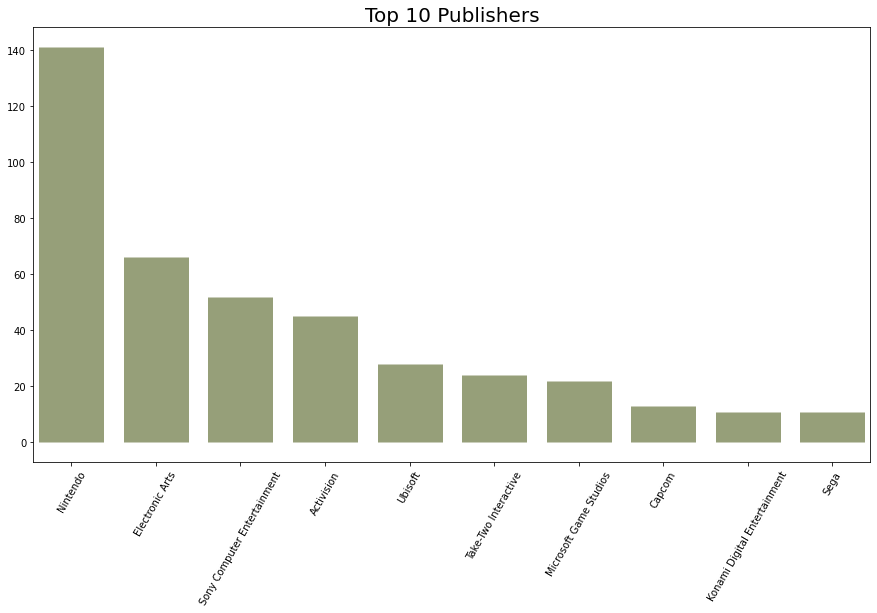

In [49]:
fig, ax = plt.subplots(figsize=(15,8), facecolor='white')
plt.xticks(rotation=60)
#top publishers of the games
ax.vlines(x=topPublisher_index, ymin=0, ymax=topPublisher_values, linewidth=65, color='#969F79')
ax.set_title('Top 10 Publishers',fontsize=20)

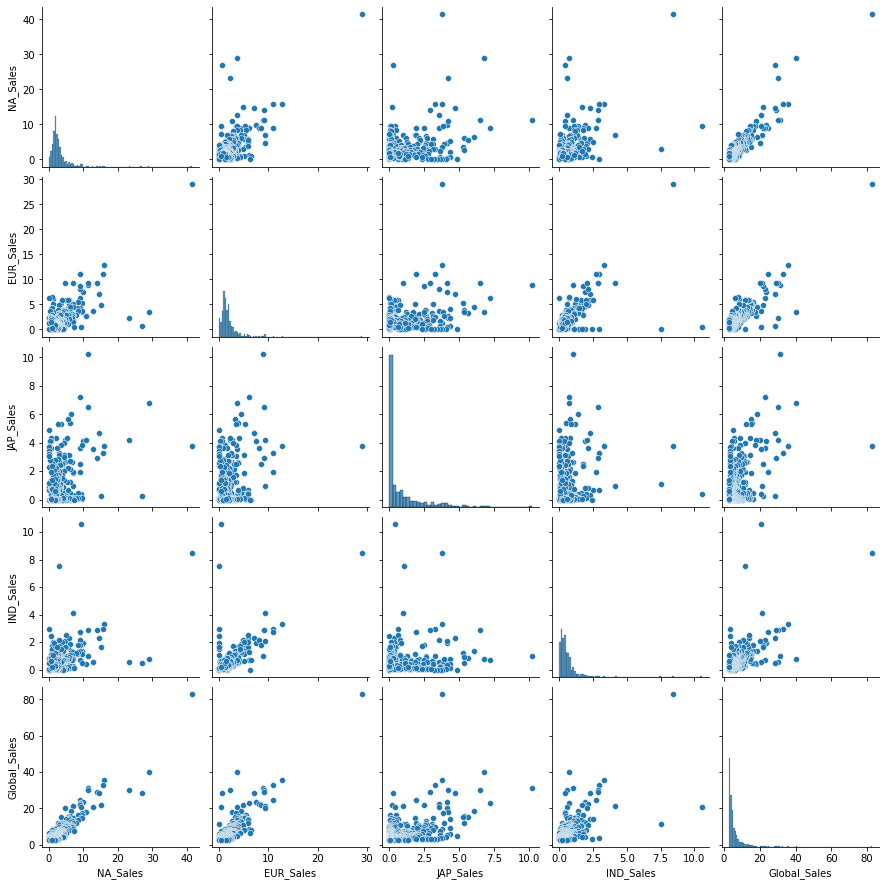

In [37]:
# Corellating among all Continents/Countries using Seaborn to perform pairplot and to plot the graph with matplotlib:

sns.pairplot(videogame_df.loc[0:,['NA_Sales','EUR_Sales','JAP_Sales','IND_Sales','Global_Sales']])
plt.show()

In [40]:
top10=videogame_df[0:10]
top10

Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EUR_Sales  JAP_Sales  IND_Sales  Global_Sales  
0     41.49      29.02       3.77       8.46         82.74  
1     29.08       3.58       6.81       0.77         40.24  
2     15.85      12.88       3.79       3.31         35.82  
3     15.75      11.01       3.28       2.96         33.00  
4     11.27       8.89      10.22       1.00         31.37  
5     23.20       2.26       4.22       0.58         30.26  
6     11.38       9.23       6.50       2.90         30.01  
7     14.03       9.20       2.93       2.85         29.02  
8     14.59       7.06       4.70       2.26         28.62  
9     26.93       0.63       0.28       0.47         28.31

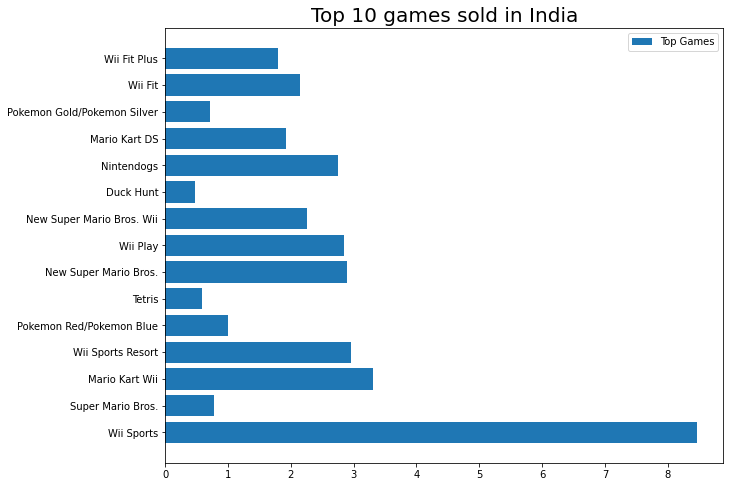

In [44]:
plt.figure(figsize = (10,8))
plt.barh(top15["Name"],top15["IND_Sales"], label = 'Top Games')
plt.title("Top 10 games sold in India",fontdict = {"fontsize":20})
plt.savefig("Top 10 games soldm in India.jpg",dpi = 300) #And to save it as an Jpeg image in the Directory
plt.legend()
plt.show()

Text(0.5, 1.0, 'Best selling games in INDIA')

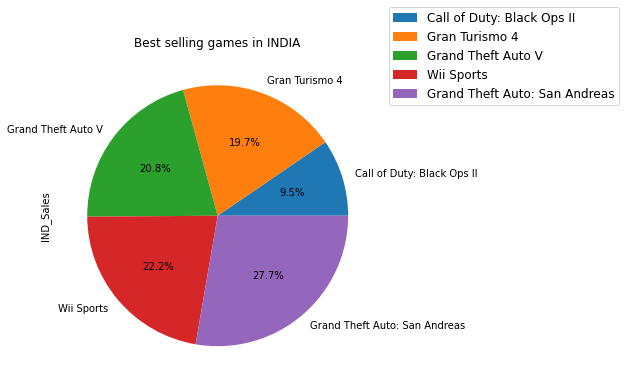

In [54]:
# For India Sales
df1 = pd.DataFrame(videogame_df.groupby('Name')['IND_Sales'].sum())
df1.sort_values(by=['IND_Sales'], inplace=True)
df1 = df1.tail(5)
df1.plot.pie(y='IND_Sales', autopct='%1.1f%%', figsize=(6, 6))
plt.legend(loc = 4,fontsize  = 12, bbox_to_anchor =(1.75, 0.82), ncol = 1)
plt.title("Best selling games in INDIA")

Text(0.5, 1.0, 'Linear graph of Global vs. India Sales')

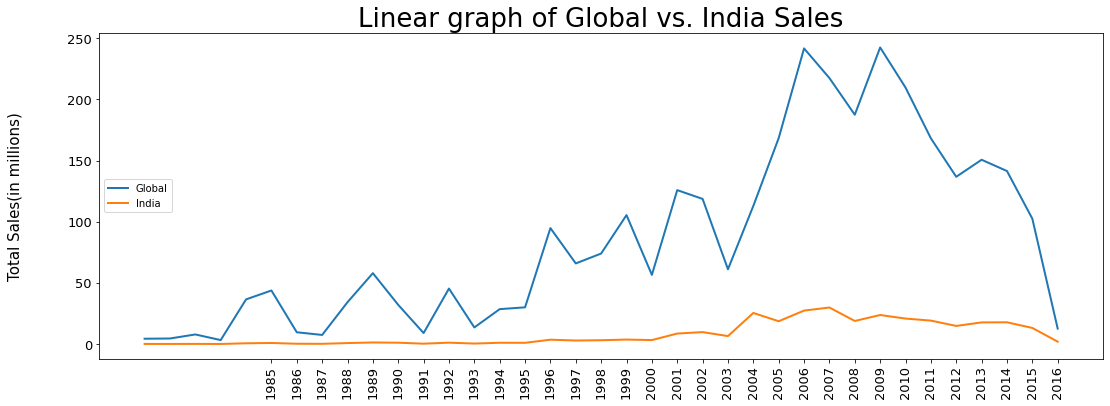

In [71]:
df_year = videogame_df.groupby('Year').sum().sort_values(by=['Year'],ascending = False)
fig,cc = plt.subplots(figsize=(18,6))
cc.plot(df_year.index,df_year['Global_Sales'],label ='Global',linewidth=2)
cc.plot(df_year.index,df_year['IND_Sales'],label ='India',linewidth=2)
cc.legend(loc="center left")

cc.set_ylabel('Total Sales(in millions)', fontsize=15,labelpad=45)
cc.set_xticks(np.arange(1985,2017,1))

cc.tick_params(axis='both', which='major', labelsize=13)
cc.grid(False)

for item in cc.get_xticklabels():
    item.set_rotation(90)
plt.title("Linear graph of Global vs. India Sales", fontdict={'fontsize':26})

C:\Users\balaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Scatterplot view of Global vs. India Sales')

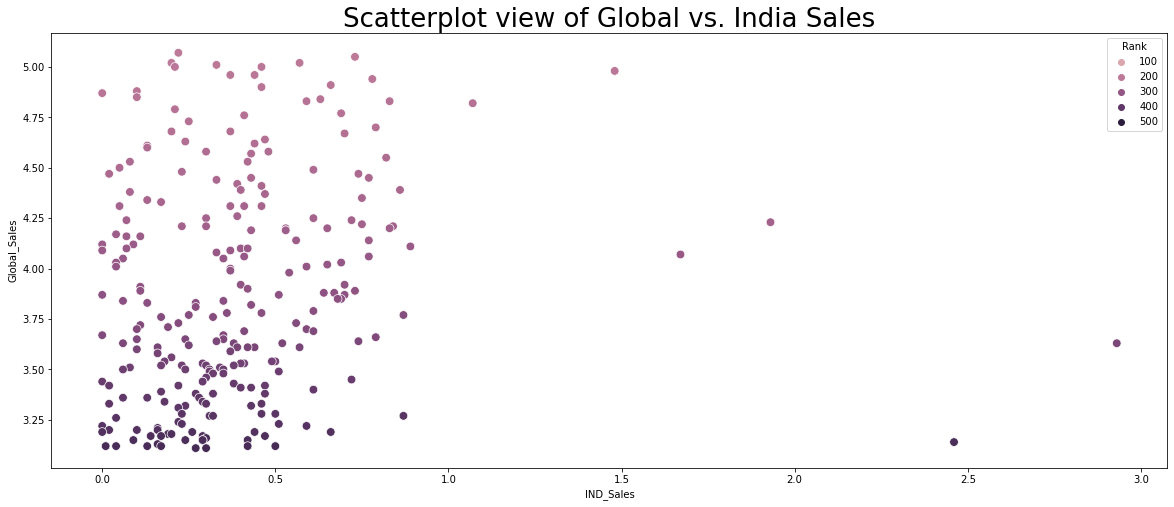

In [69]:
#Scatterplot Method
plt.figure(figsize=(20,8))
sns.scatterplot(videogame_df.IND_Sales[200:450], # X-axis taken in range from 200 to 450
                videogame_df.Global_Sales[200:450],  # Y-axis taken in range from 200 to 450
                hue=videogame_df.Rank,  # Dot color
                s=75)
plt.title("Scatterplot view of Global vs. India Sales", fontdict={'fontsize':26})

#Xlabel and Ylabel are in millions

C:\Users\balaj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\balaj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\balaj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\balaj\anaconda3\lib\site-pac

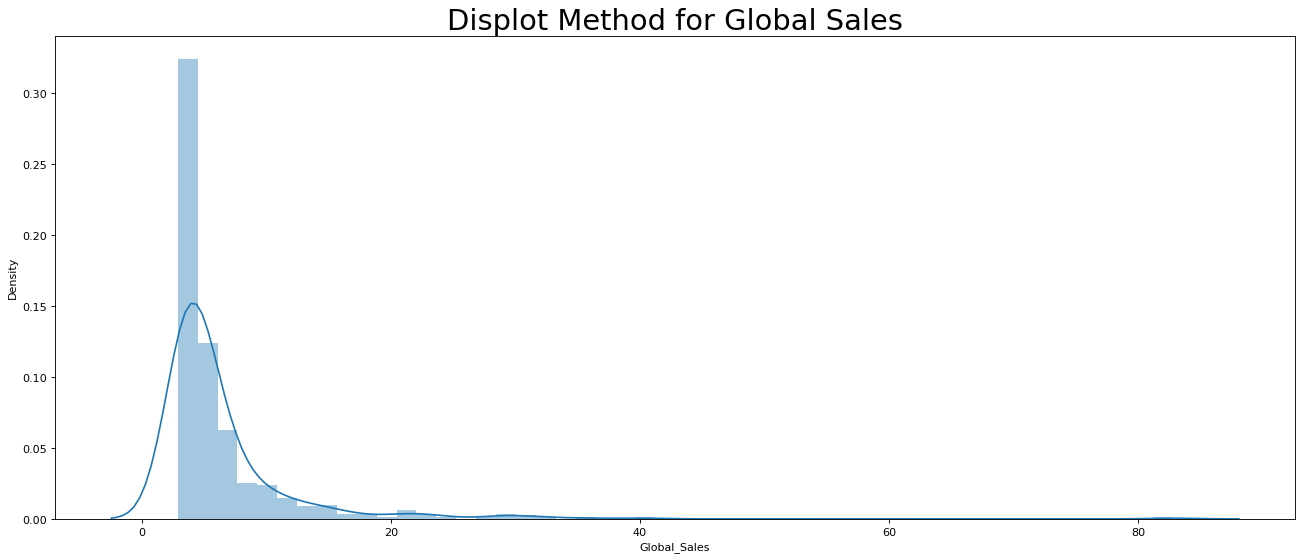

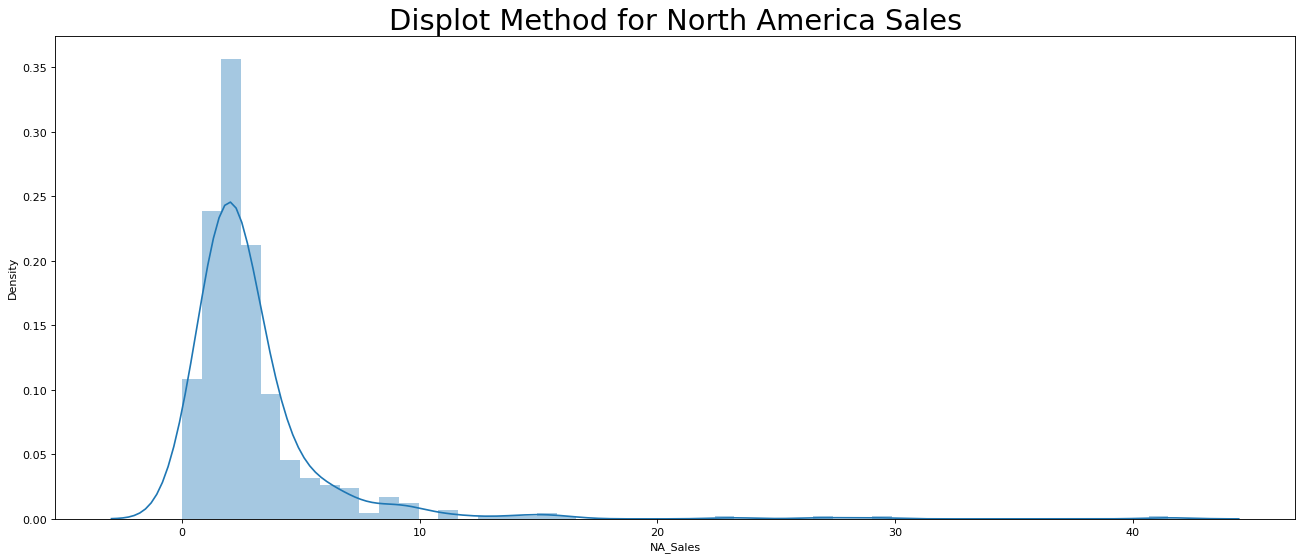

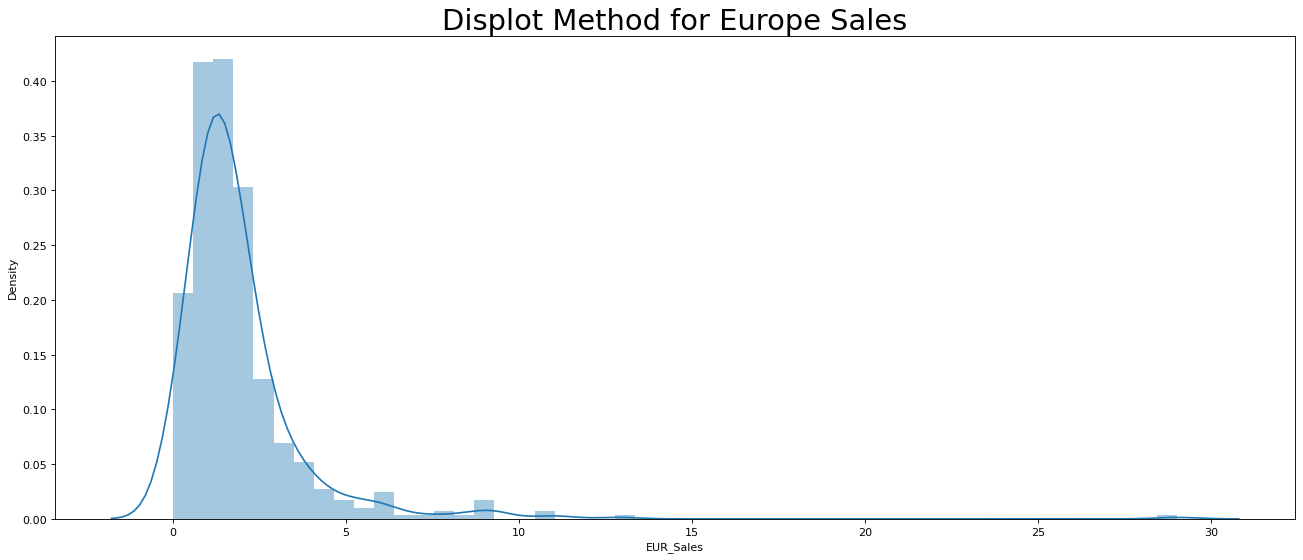

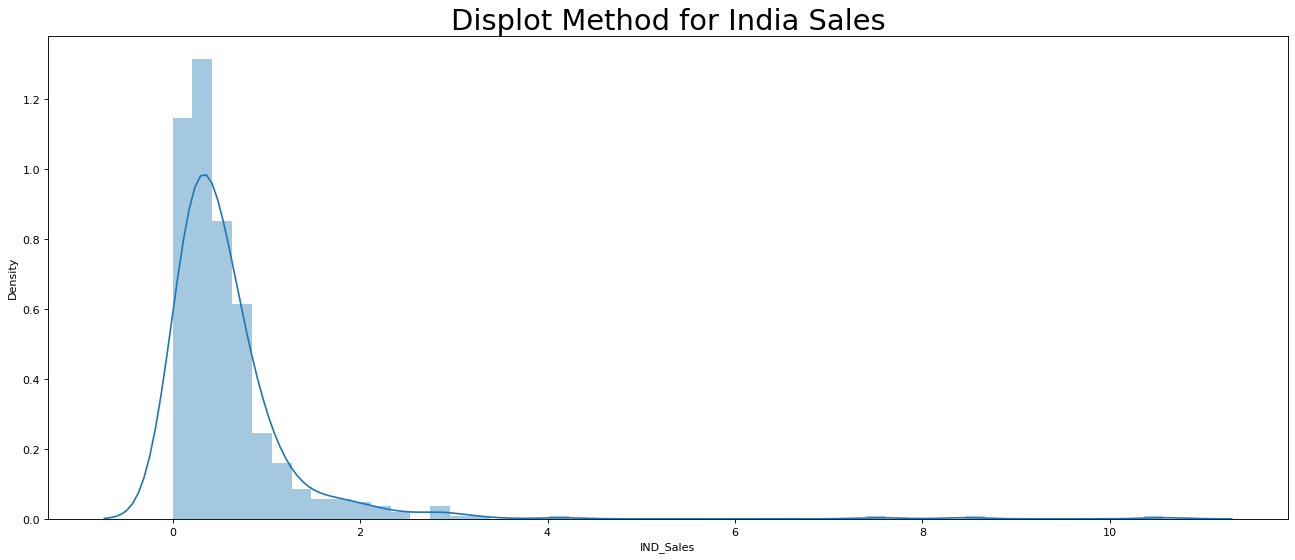

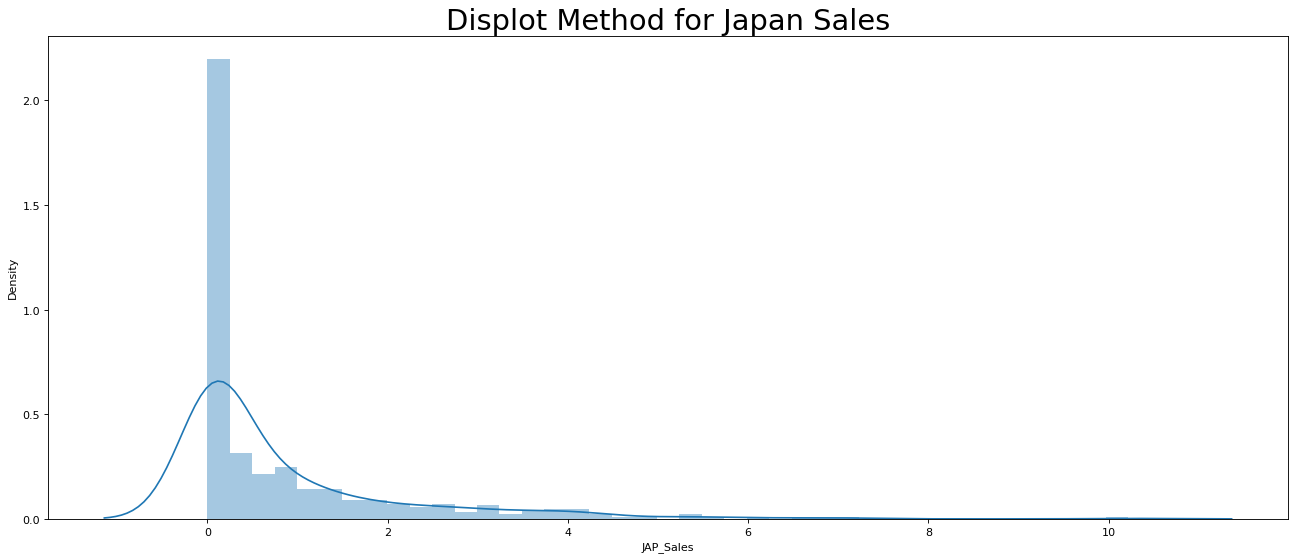

In [72]:
#Displot Method

df_name = ['Global','North America', 'Europe', 'India', 'Japan']
j = 0
df_lst = [videogame_df.Global_Sales,
          videogame_df.NA_Sales,
          videogame_df.EUR_Sales,
          videogame_df.IND_Sales,
          videogame_df.JAP_Sales]

for i in df_lst:
    plt.figure(figsize=(20,8), dpi= 80)
    sns.distplot(i)
    plt.title('Displot Method for '+str(df_name[j])+' Sales', fontdict={'fontsize':26})
    j += 1

In [ ]:
#View the Sales trend between Global and India in 3D Plot

In [73]:
t = np.linspace(0, 40, 100)
x, y, z = videogame_df.IND_Sales, videogame_df.Global_Sales, t

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=8,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])
import plotly
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
plotly.offline.plot(fig, filename='my3Dplot.html')

fig.show()